# Exploring word frequency

Last revised 2018-06-27

## Housekeeping

Import `nltk`, including the `PlaintextCorpusReader`, and read the corpus into a variable. This tutorial assumes that you have downloaded the NLTK inaugural address corpus from https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/inaugural.zip and unzipped it on your local filesystem. If you haven't taken care of it already, Bush 2005 file will give you an encoding error; follow instructions from Day 3 to fix it. 

In [1]:
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = "C:/Users/narae/Desktop/inaugural" # edit this to point to the location on your machine
inaug = PlaintextCorpusReader(corpus_root, ".*txt")

## How frequent is “the” in each speech?

Loop over the files in the corpus and create a frequency distribution object (called `x`) for each file in turn. Use that object to find the relative frequency (on a scale of 0 to 1) of the word “the” in each speech. To make the result easier to read, use `format()` to format the frequency as a percentage that extends to exactly two decimal places. Return the percentage and the file identifier.

In [2]:
for f in inaug.fileids():
    x = nltk.FreqDist(inaug.words(f))              # frequency distribution for each speech
    freq_the = x.freq("the") + x.freq("The")       # loop over all files
    print('{:.2%}'.format(freq_the), f, sep='\t')  # separate by tab for readability

7.54%	1789-Washington.txt
8.84%	1793-Washington.txt
6.31%	1797-Adams.txt
6.72%	1801-Jefferson.txt
6.00%	1805-Jefferson.txt
8.22%	1809-Madison.txt
7.67%	1813-Madison.txt
7.45%	1817-Monroe.txt
7.33%	1821-Monroe.txt
9.65%	1825-Adams.txt
7.62%	1829-Jackson.txt
7.97%	1833-Jackson.txt
6.04%	1837-VanBuren.txt
9.05%	1841-Harrison.txt
7.64%	1845-Polk.txt
8.38%	1849-Taylor.txt
6.29%	1853-Pierce.txt
7.68%	1857-Buchanan.txt
6.39%	1861-Lincoln.txt
7.39%	1865-Lincoln.txt
6.70%	1869-Grant.txt
7.17%	1873-Grant.txt
8.81%	1877-Hayes.txt
9.79%	1881-Garfield.txt
9.52%	1885-Cleveland.txt
7.58%	1889-Harrison.txt
7.25%	1893-Cleveland.txt
7.89%	1897-McKinley.txt
8.16%	1901-McKinley.txt
5.96%	1905-Roosevelt.txt
8.31%	1909-Taft.txt
5.72%	1913-Wilson.txt
5.68%	1917-Wilson.txt
5.32%	1921-Harding.txt
5.88%	1925-Coolidge.txt
7.25%	1929-Hoover.txt
6.30%	1933-Roosevelt.txt
5.25%	1937-Roosevelt.txt
7.42%	1941-Roosevelt.txt
4.24%	1945-Roosevelt.txt
5.58%	1949-Truman.txt
6.16%	1953-Eisenhower.txt
5.95%	1957-Eisenhower.t

## Graphing the results

It’s easier to see the results on a graph than in a list. Let’s do that!

### Installing `matplotlib`

If you don’t have `matplotlib` (a graphing package) installed (or if you aren’t sure whether you have it installed), uncomment the following cell and run it. If you have to install `matplotlib`, it may take a while. The installation process will provide a report at the end, which you can ignore unless it notifies you of an error.

In [ ]:
!pip install matplotlib

## Using `matplotlib`

`matplotlib` can be used to plot graphs that are rendered inside Jupyter Notebook. We first import `matplotlib`, and we alias it as `plt` because that’s easier to type than the real full name. (The import may take a long time the first time you run it.) We then use a list comprehension to create a list of pairs of filename (just the last four characters, the year) plus the frequency of “the” in that particular file. We’ll look at the first few pairs to verify that it works.

In [3]:
import matplotlib.pyplot as plt
pairs = [(f[:4], nltk.FreqDist(inaug.words(f)).freq("the")) for f in inaug.fileids()]
pairs[:5]

[('1789', 0.07477243172951886),
 ('1793', 0.08843537414965986),
 ('1797', 0.06112185686653772),
 ('1801', 0.06614987080103359),
 ('1805', 0.057885906040268456)]

`matplotlib` expects the X and Y values for the plot points to be supplied in separate lists: first a list of X values and then a list of Y values. We can use a combination of the `list()` function, the `zip()` function, and the `*` (unpack) operator to reformat the list of pairs into a list that contains just two items, all of the years (which will be the X values) and all of the frequencies (which will be the Y values). You can look up these Python features on line for more information. We’ll turn off pretty printing to make the result easier to see.

In [4]:
unzipped = list(zip(*pairs))
%pprint
unzipped

Pretty printing has been turned OFF


[('1789', '1793', '1797', '1801', '1805', '1809', '1813', '1817', '1821', '1825', '1829', '1833', '1837', '1841', '1845', '1849', '1853', '1857', '1861', '1865', '1869', '1873', '1877', '1881', '1885', '1889', '1893', '1897', '1901', '1905', '1909', '1913', '1917', '1921', '1925', '1929', '1933', '1937', '1941', '1945', '1949', '1953', '1957', '1961', '1965', '1969', '1973', '1977', '1981', '1985', '1989', '1993', '1997', '2001', '2005', '2009'), (0.07477243172951886, 0.08843537414965986, 0.06112185686653772, 0.06614987080103359, 0.057885906040268456, 0.08063241106719368, 0.07285276073619631, 0.07148659626320066, 0.06824200448156448, 0.09111111111111111, 0.0728476821192053, 0.07576953433307025, 0.057540158235435145, 0.0867430441898527, 0.073518090839107, 0.08121827411167512, 0.057971014492753624, 0.07488702388637831, 0.0599250936329588, 0.07006369426751592, 0.06053268765133172, 0.06765899864682003, 0.08296622613803231, 0.08922506946588453, 0.09135667396061269, 0.06589473684210527, 0.06

Although the years look like numbers to us, Python is treating them as strings, which we know because they’re wrapped in quotation marks. Python thinks they’re strings because we sliced them out of the filenames, which are strings. For our purposes (we’re just going to use them as labels on the X axis), the datatype doesn’t matter. 

You may have noticed that the two items in the `unzipped` list are not really lists, since they are delimited by parentheses, and not by square brackets. The technical terms for this type of object in Python in _tuple_. You can think of it as similar to a list in that both are sequences of objects. Tuples have some different properties from lists, but `matplotlib` is equally happy with two tuples or two lists, so we’ll leave them as is.

To control the size of the image we need to set axis values for our graphic with `plt.axes()`. The four values in the list are, in order, the lowest X value, the lowest Y value, the width, and the height. How this looks depends on the size and resolution of your screen; feel free to experiment with the values. We then plot our data by passing in the X and Y values as two arguments to `plt.plot()`. In order to make the graph visible, we need to call `plt.show()`.

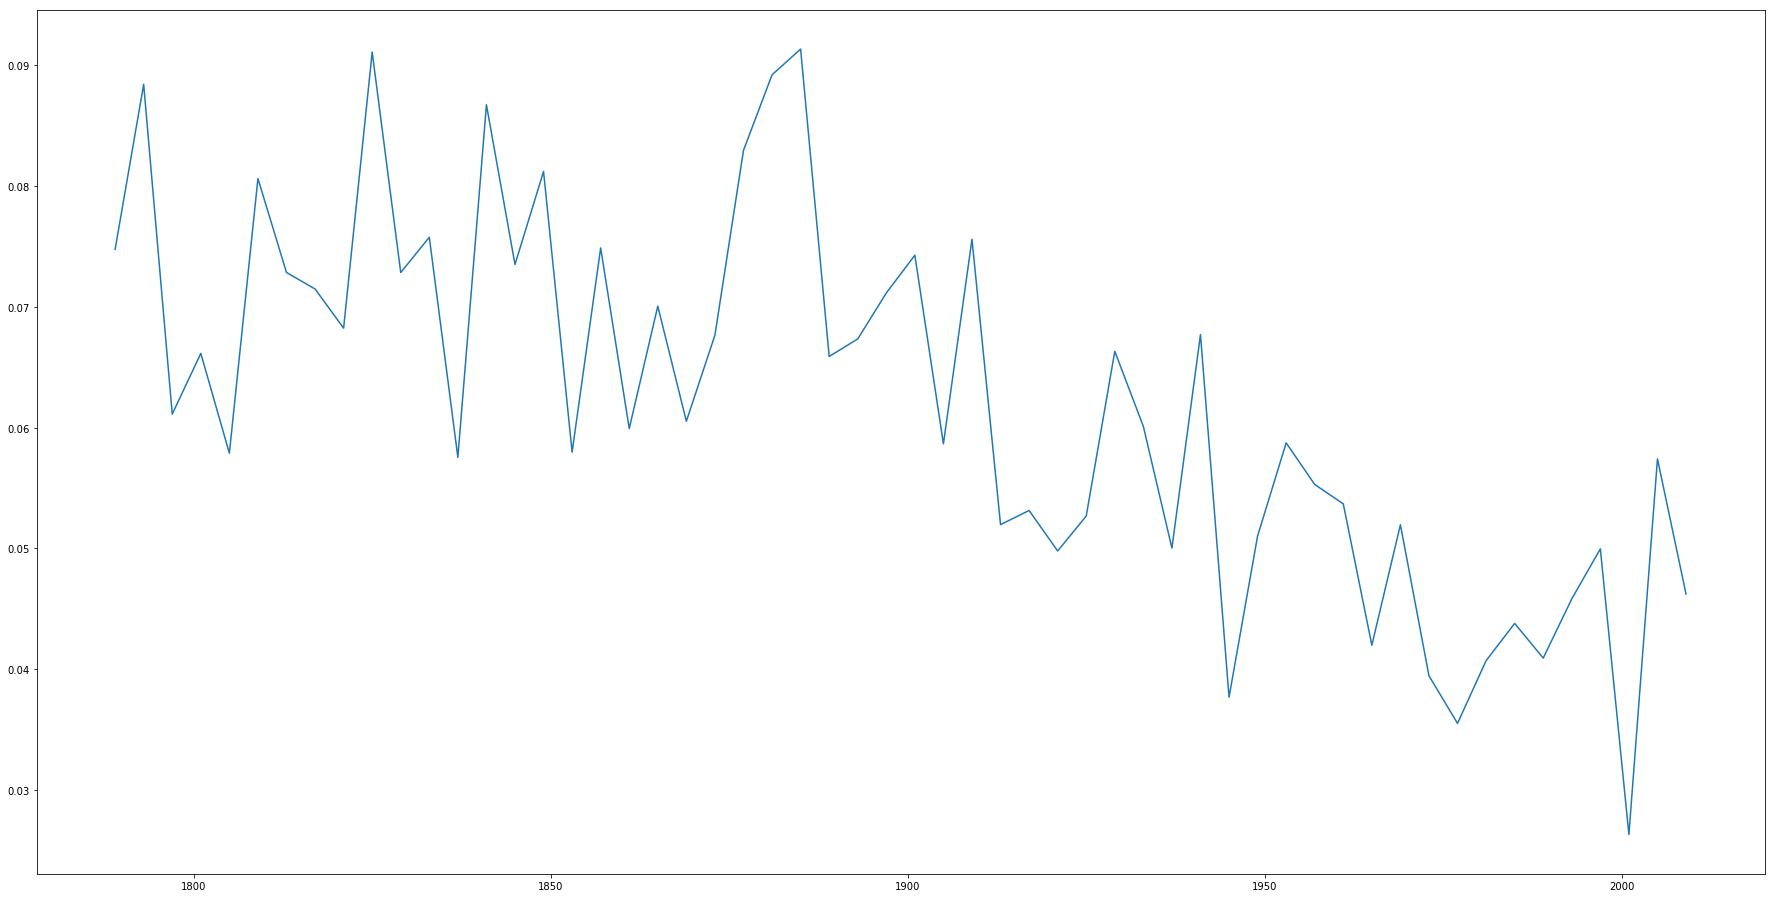

In [5]:
plt.axes([1, 1, 4, 3])
plt.plot(unzipped[0], unzipped[1])
plt.show()